# Load Data

In [1]:
import pandas as pd

In [5]:
csv_path = ''
data = pd.read_csv(csv_path)

In [ ]:
data.columns = ['text', 'label']
data.label = data.label.apply(lambda x: (x,))
data.head(5)

# Filter Dialogues By Tags

In [22]:
df = data.copy()

In [23]:
def filterDialoguesByTag(data, tag):
  text_df = []
  label_df = []
  for i, row in data.iterrows():
    if (tag in row['text']):
      text_df.append(row['text'])
      label_df.append(row['label'])
  return pd.DataFrame(data = {"text": text_df, "label": label_df})

In [ ]:
#df = filterDialoguesByTag(df, "amo") # email
df.shape

In [25]:
import random
dialogues = df.text.values

In [26]:
random.shuffle(dialogues)

# KTrain Model - Topic Modeling

In [ ]:
!pip install ktrain

In [28]:
import numpy as np
import ktrain
from ktrain import text 

In [ ]:
tm = ktrain.text.get_topic_model(dialogues, n_topics = 20, n_features=100)

In [ ]:
topics = tm.get_topics()
topics

# Preprocessing Topics - Analysis

In [31]:
splitted_topics = list(map(lambda t: t.split(" "), topics))

In [ ]:
!pip install deep_translator

In [34]:
from deep_translator import GoogleTranslator
translator = GoogleTranslator(source='auto', target='en')

def translateSplittedTopics(topics, translator):
    translated_topics = []
    for l in topics:
        nl = []
        for t in l:
            try :
                translated = translator.translate(t)
                nl.append(translated)
            except:
                nl.append(t)
        translated_topics.append(nl)
    return translated_topics

splitted_topics = translateSplittedTopics(splitted_topics, translator)
translated_topics = list(map(lambda t: " ".join(t), splitted_topics))

In [ ]:
for i in range(len(translated_topics)): print("%d -> %s" % (i, translated_topics[i]))

# Print Sentences By Topics

In [ ]:
tm.build(dialogues, threshold=0.4)

In [ ]:
tm.print_topics(show_counts=True)

# Filter Topics

In [51]:
selected_topics = [17]

In [ ]:
def filterTopics(selected_topics, translated_topics):
    filtered_topics = []
    for n in selected_topics:
        filtered_topics.append((n, translated_topics[n]))
    return filtered_topics

filtered_topics = filterTopics(selected_topics, translated_topics)
filtered_topics

# Translate Sentences

In [ ]:
import random

def printSentencesByTopics(selected_topics, n):
    sentences = []
    for tid in selected_topics:
        l = tm.get_docs(topic_ids=[tid], rank=True)
        if (len(l) > 0):
            tstr = "Topic " + str(tid)
            print("=" * 22 + " " + tstr + " " + "=" * 22 )
            if (n < len(l)):
                l = random.sample(l, n)
                for e in l:
                    translated = translator.translate(e['text'])
                    print("-> " + translated)
                    sentences.append(translated)
            else:
                for i in range(n):
                    if (i < len(l)):
                        translated = translator.translate(l[i]['text'])
                        print("-> " + translated)
                        sentences.append(translated)
    return sentences

#sentences = printSentencesByTopics(selected_topics, 50)

# Generate WordCloud - Sentences (Topics)

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

sentences = ". ".join(sentences)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(sentences)
plt.figure(figsize=(20, 6)).suptitle("Sentences - Wordcloud", fontsize=20)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Filter Dialogues By Tags - Topic Modelling

In [55]:
for t in selected_topics:
    for s in topics[t]:
        df = filterDialoguesByTag(df, s)

In [ ]:
df.shape

# Generate Word Cloud - Dialogues

In [ ]:
def translateText(text, translator):
    try:
        return translator.translate(text)
    except:
        return text

n_texts = 150
translated_text = list(map(lambda x: translateText(x, translator), random.sample(list(df.text.values), n_texts)))
translated_text = ". ".join(translated_text)

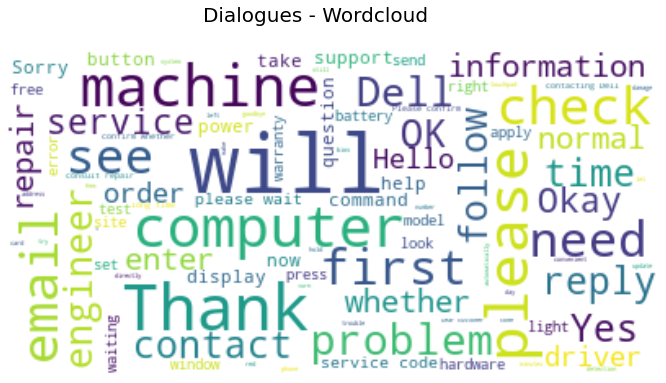

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(translated_text)
plt.figure(figsize=(20, 6)).suptitle("Dialogues - Wordcloud", fontsize=20)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()